In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "/kaggle/input/global-air-pollution-dataset/global air pollution dataset.csv"
data = pd.read_csv(file_path)

data.replace([np.inf, -np.inf], np.nan, inplace=True)
data = data.dropna()

In [2]:
data['AQI Value'] = pd.to_numeric(data['AQI Value'], errors='coerce')

# Drop rows with missing values in 'AQI Value' or 'AQI Category'
data.dropna(subset=['AQI Value', 'AQI Category'], inplace=True)

# Perform ANOVA
model = ols('Q("AQI Value") ~ C(Q("AQI Category"))', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                            sum_sq       df             F  PR(>F)
C(Q("AQI Category"))  6.912410e+07      5.0  78711.140604     0.0
Residual              4.044812e+06  23029.0           NaN     NaN


Дивлячись на результати дисперсійного аналізу (ANOVA):
`sum_sq` - сума квадратів для кожного джерела варіації (у моєму випадку між категоріями);
`df` (degrees of freedom) - ступені свободи, пов'язані з джерелами варіації;
`F` - F-статистика, яка є відношенням середнього квадратичного між групами до середнього квадратичного всередині груп;
`PR(>F)` - p-значення, пов’язане з F-статистикою;
`C(Q("AQI Category"))` - різниця між категоріями AQI.
P-значення (PR(>F)) для категорій AQI становить 0,0, що набагато менше, ніж типовий рівень значущості 0,05. Такі резульати показують на наявність статистично значущих відмінностей у значеннях AQI між різними категоріями AQI.

Також використано тест Тьюкі, який наведено нижче.

In [3]:
tukey = pairwise_tukeyhsd(endog=data['AQI Value'], groups=data['AQI Category'], alpha=0.05)
print(tukey)

                          Multiple Comparison of Means - Tukey HSD, FWER=0.05                           
            group1                         group2              meandiff p-adj   lower     upper   reject
--------------------------------------------------------------------------------------------------------
                          Good                      Hazardous  404.4283   0.0  401.6685  407.1881   True
                          Good                       Moderate   29.9532   0.0   29.4016   30.5048   True
                          Good                      Unhealthy  130.2189   0.0  129.3293  131.1084   True
                          Good Unhealthy for Sensitive Groups    84.692   0.0   83.6639   85.7202   True
                          Good                 Very Unhealthy  191.6625   0.0  189.3963  193.9286   True
                     Hazardous                       Moderate -374.4751   0.0 -377.2366 -371.7136   True
                     Hazardous                      Unh

Результати тесту Тьюкі показують, що існують значні відмінності між середніми значеннями AQI для кожної пари категорій AQI. Наприклад, різниця між `Good(«Добре»)` та `Hazardous («Небезпечно»)` становить `404,4283` з довірчим інтервалом від `401,6685` до `407,1881`, і різниця досить велика.
Різниця між `Moderate «помірним»)` і `Unhealthy «Нездоровим»` становить `100,2657` з довірчим інтервалом від `99,3707` до `101,1607`, і різниця також.

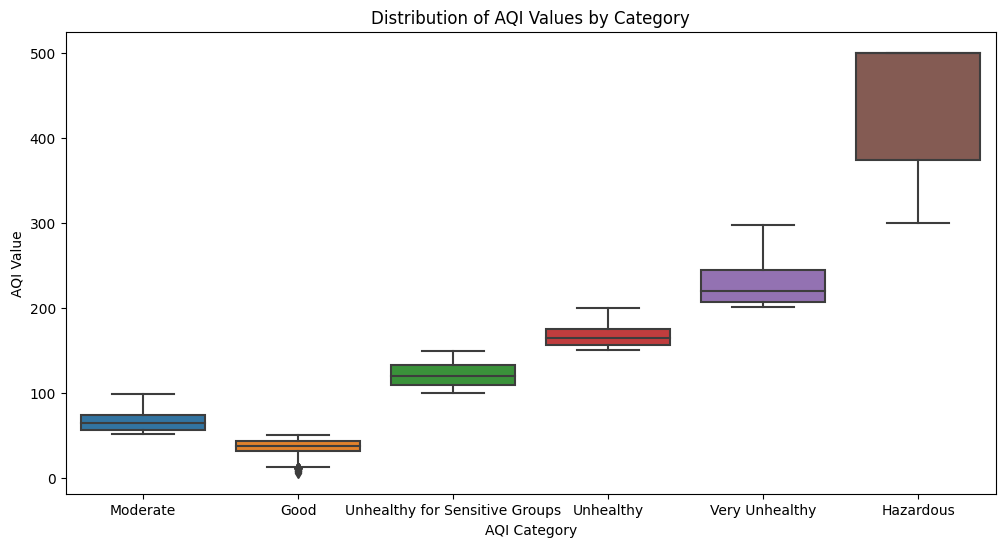

In [4]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='AQI Category', y='AQI Value', data=data)
plt.title('Distribution of AQI Values by Category')
plt.xlabel('AQI Category')
plt.ylabel('AQI Value')
plt.show()